In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv('five_dataset.csv')
df.head()
print(df.isnull().sum())
print(df.columns.tolist())

hours_worked             0
meetings_attended        0
experience_years         0
task_completion_score    0
satisfaction_score       0
dtype: int64
['hours_worked', 'meetings_attended', 'experience_years', 'task_completion_score', 'satisfaction_score']


In [6]:
x = df[['hours_worked', 'meetings_attended', 'experience_years']].values.reshape(-1,3)
y = df[['task_completion_score', 'satisfaction_score']].values.reshape(-1,2)

xs = MinMaxScaler()
ys = MinMaxScaler()

x = xs.fit_transform(x)
y = ys.fit_transform(y)

jb.dump(xs,"five_x_scaler.pkl")
jb.dump(ys,"five_y_scaler.pkl")

['five_y_scaler.pkl']

In [7]:
def performance(hw, ma, e):
    inp = np.array([[hw, ma, e]], dtype=float)
    xs = jb.load("five_x_scaler.pkl")
    ys = jb.load("five_y_scaler.pkl")
    inp = xs.transform(inp)
    model_path = 'five.keras'
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(3,), activation='relu'),
                                    keras.layers.Dense(16, activation='relu'),
                                    keras.layers.Dense(units=2)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        h = model.fit(x, y, epochs=200)
        model.save('five.keras')
        lv = h.history['loss']
        pred= model.predict(x)
        plt.figure()
        plt.plot(lv)
        plt.grid(True)
        plt.title('loss values')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.show()

        plt.figure()
        plt.subplot(1,2,1)
        plt.title('task completion score')
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.scatter(y[:,0], pred[:,0], label='actual vs predicted', color='Pink')
        plt.plot([y[:,0].min(), y[:,0].max()],[y[:,0].min(), y[:,0].max()], 'k--')
        plt.legend()
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.title('satisfaction score')
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.scatter(y[:,1], pred[:,1],label="actual vs predicted", color='green')
        plt.plot([y[:,1].min(), y[:,1].max()], [y[:,1].min(), y[:,1].max()], 'k--')
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()
    return ys.inverse_transform(model.predict(inp))[0]


c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.3614
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3429
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3061
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2816
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2524
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2226
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1964
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1686
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1580
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1477
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1095
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1007
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0805
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0771
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0612
Epoch 16/200
4/4 ━━

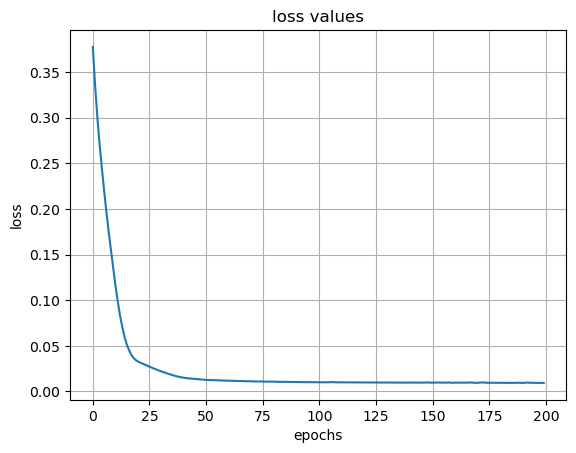

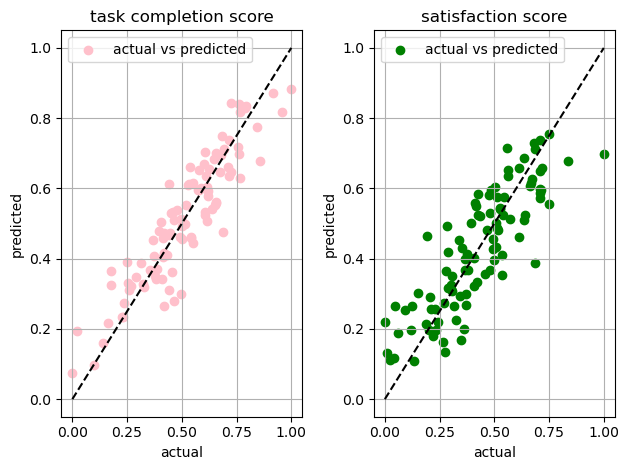

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Task Completion Score: 17.54, Predicted Satisfaction Score: 61.00


In [8]:
result = performance(8, 5, 2)
print(f"Predicted Task Completion Score: {result[0]:.2f}, Predicted Satisfaction Score: {result[1]:.2f}")
